<div style="background-color:rgba(20, 20, 20, 0.8); color:white; padding:10pt" >    

# **TP Introduction au traitement d'images**
&mdash; **`alain.lebret@ensicaen.fr`** &mdash;

### Partie 2 : Histogramme et égalisation d'histogramme


## Dépendances

In [3]:
#
# Loads required libraries 
#
import numpy as np          # histogram()
import skimage              # scikit-image
from skimage import data    # some images to use
from skimage import io      # open, write, etc. image files
from skimage import color   # conversion between color spaces 
from skimage import filters # threshold_mean 
from matplotlib import pyplot as plt # also hist()

#
# Uncomments the lines below if using Google Colab
#
#from google.colab import drive

In [4]:
root_path = './ressources'
smaller = root_path + '/256x256'
medium = root_path + '/512x512'
various = root_path + '/divers'

## 1. Histogramme

L'histogramme d'une image est une représentation graphique de la distribution des niveaux d'intensité lumineuse dans une image numérique. L'axe des abscisses représente les différentes luminosités (généralement de 0 à 255 pour une image en niveaux de gris), et l'axe des ordonnées indique le nombre de pixels de l'image qui ont chacune de ces intensités. L'histogramme fournit ainsi une information globale sur le contraste et l'intensité lumineuse dans une image.

Si l'histogramme est concentré dans une certaine plage d'intensités (par exemple, près des tons sombres), cela signifie que l'image manque de contraste et peut paraître trop sombre ou trop claire. Une distribution équilibrée des intensités sur l'histogramme indique généralement une bonne qualité d'image avec un contraste approprié.

#### Calcul et affichage de l'histogramme : Première méthode
Cette méthode utilise la fonction [`histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html#numpy.histogram) de *Numpy*. Le premier paramètre nécessite que l'image soit transformée en tableau à une dimension (à l'aide de la fonction [flatten()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)).

```python
histogram, bins = np.histogram(image.flatten(), bins=256, range=[0, 255])
plt.plot(histogram)
```

#### Calcul et affichage de l'histogramme : 2ème méthode

Cette méthode utilise la fonction [`ravel()`](https://numpy.org/doc/stable/reference/generated/numpy.ravel.html#numpy.ravel) de *Numpy* et permet également d'obtenir un tableau à une dimension.

```python
plt.hist(image.ravel(), bins = 256, range = [0, 255])
```

#### Affichage de l'histogramme : 3ème méthode

```python
plt.bar(bins[:-1], histogram, width=1, edgecolor='none')
```

Ces méthodes vous permettent de calculer et d'afficher l'histogramme d'une image, ce qui est utile pour comprendre la distribution des niveaux d'intensité lumineuse dans l'image.

#### Affichage de l'histogramme d'une image couleur

Les histogrammes précédents concernent les images en niveaux de gris. Pour les images couleur, vous pouvez utiliser le code suivant. Dans ce code, la fonction [`zip()`](https://docs.python.org/3.3/library/functions.html#zip) est utilisée pour prendre une série d'une ou plusieurs listes et retourner un itérateur de tuples, où le premier tuple contient le premier élément de chaque liste, le deuxième contient le deuxième élément de chaque liste, et ainsi de suite.

```python
cat = data.chelsea() # another inner image

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 255])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        cat[:, :, channel_id], bins=256, range=(0, 255)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")
plt.show()
```

Ce code vous permet d'afficher l'histogramme d'une image couleur en séparant les canaux de couleur (rouge, vert, bleu) pour mieux comprendre la distribution des valeurs de couleur dans l'image.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 1.1**

1. Affichez l'histogramme de l'image couleur "play-balls.jpg".
2. Affichez l'histogramme des 3 canaux de l'image couleur "play-balls.jpg".

---
    
</div>

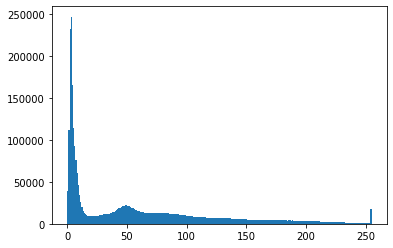

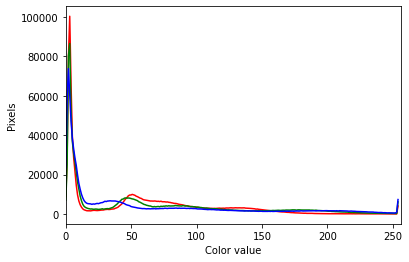

In [8]:
#
# Mettez votre code ici
#

rondelles = io.imread(various + "/play-balls.jpg")
plt.hist(rondelles.ravel(), bins = 256, range = [0, 255]) 
plt.show()

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        rondelles[:, :, channel_id], bins=256, range=(0, 255)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")
plt.show()

## 2. Transformations simples et histogramme

Nous allons réaliser quelques opérations simples sur les images en niveaux de gris et observer leurs conséquences sur leurs histogrammes.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 2.1**

1. Réaliser l'opération d'inversion sur l'image en niveaux de gris "circuit_512x512.jpg", puis afficher sur une même figure, l'image d'origine et l'image obtenue après inversion, ainsi que leurs histogrammes.
2. Modifier la luminosité et le contraste de l'image pour différentes valeurs et afficher les images résultantes ainsi que leurs histogrammes correspondants.

---
    
</div>

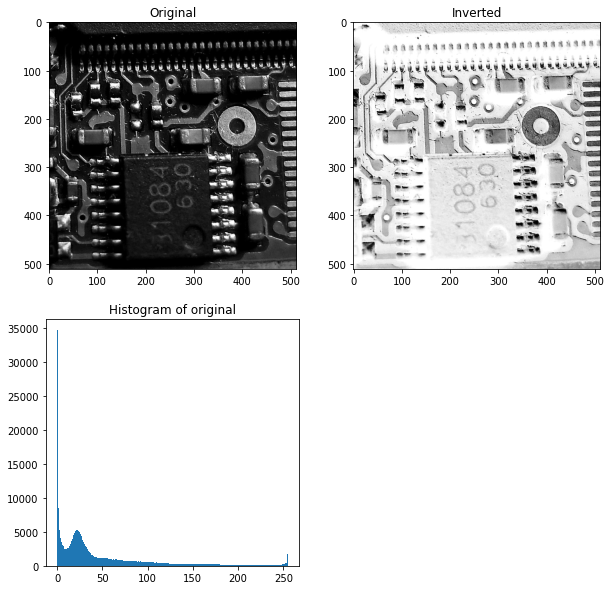

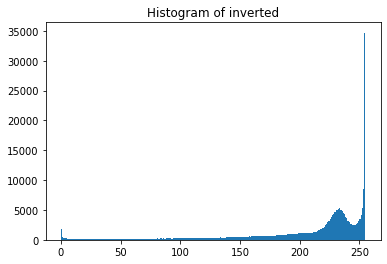

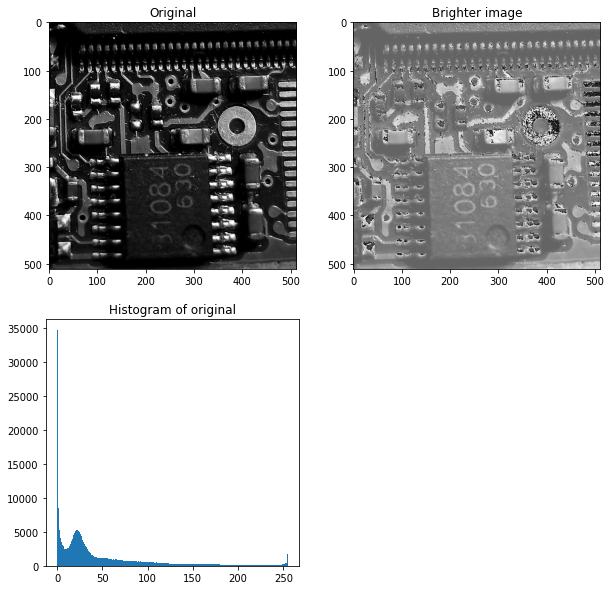

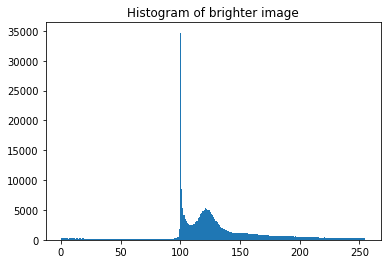

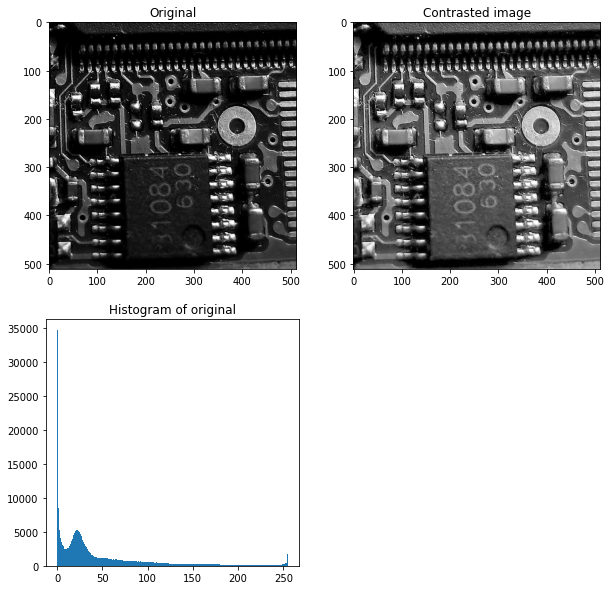

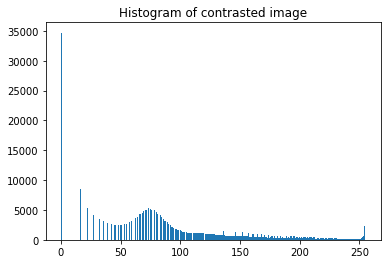

In [6]:
#
# Mettez votre code ici
#

input_image = io.imread(medium + "/circuit_512x512.jpg")
gray = color.rgb2gray(rondelles);

#
# Inversion
#
inverted = 255 - input_image

figure = plt.figure(figsize=(10, 10))
figure.add_subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input_image, cmap='gray')

figure.add_subplot(2, 2, 2)
plt.title("Inverted")
plt.imshow(inverted, cmap='gray')

figure.add_subplot(2, 2, 3)
plt.hist(input_image.ravel(), bins = 256, range = [0, 255]) 
plt.title("Histogram of original")
plt.show()

figure.add_subplot(2, 2, 4)
plt.hist(inverted.ravel(), bins = 256, range = [0, 255]) 
plt.title("Histogram of inverted")
plt.show()

#
# Luminance
#
brighter = input_image + 100

figure = plt.figure(figsize=(10, 10))
figure.add_subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input_image, cmap='gray')

figure.add_subplot(2, 2, 2)
plt.title("Brighter image")
plt.imshow(brighter, cmap='gray')

figure.add_subplot(2, 2, 3)
plt.hist(input_image.ravel(), bins = 256, range = [0, 255]) 
plt.title("Histogram of original")
plt.show()

figure.add_subplot(2, 2, 4)
plt.hist(brighter.ravel(), bins = 256, range = [0, 255]) 
plt.title("Histogram of brighter image")
plt.show()

#
# Contrast
#
contrasted = 255.0 * (input_image / 255.0) ** 0.5

figure = plt.figure(figsize=(10, 10))
figure.add_subplot(2, 2, 1)
plt.title("Original")
plt.imshow(input_image, cmap='gray')

figure.add_subplot(2, 2, 2)
plt.title("Contrasted image")
plt.imshow(contrasted, cmap='gray')

figure.add_subplot(2, 2, 3)
plt.hist(input_image.ravel(), bins = 256, range = [0, 255]) 
plt.title("Histogram of original")
plt.show()

figure.add_subplot(2, 2, 4)
plt.hist(contrasted.ravel(), bins = 256, range = [0, 255]) 
plt.title("Histogram of contrasted image")
plt.show()

## 3. Égalisation d'histogramme

L'égalisation d'histogramme est une méthode pour ajuster les contrastes d'une image en modifiant l'histogramme de l'image de manière à ce qu'il soit approximativement plat, c'est-à-dire que chaque niveau d'intensité de l'image apparaisse à peu près le même nombre de fois dans l'histogramme. Cela a pour effet de rendre les zones sombres de l'image plus claires et les détails de l'image plus visibles. La fonction `histeq()` ci-dessous réalise une égalisation d'histogramme. 

```python
def histeq(image, nbr_bins = 256):
    """ Histogram equalization of a grayscale image.  """
    # get the image histogram
    imhist, bins = np.histogram(image.flatten(), nbr_bins, [0, 255])
    cdf = imhist.cumsum()                # cumulative distribution function
    cdf = imhist.max() * cdf / cdf.max() # normalization
    cdf_mask = np.ma.masked_equal(cdf, 0)
    cdf_mask = (cdf_mask - cdf_mask.min()) * 255 / (cdf_mask.max() - cdf_mask.min())
    cdf = np.ma.filled(cdf_mask,0).astype('uint8')
    return cdf[image.astype('uint8')]
```

**Remarque** : la fonction [`equalize_hist()`](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.equalize_hist) du module `exposure` de *Scikit-image* réalise aussi cette opération.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 3.1**

1. Réaliser une égalisation d'histogramme de l'image "circuit_512x512.jpg". Vous afficherez sur une même figure, l'image d'origine et l'image obtenue après égalisation.
2. Afficher les histogrammes pour les deux images précédentes.

---
    
</div>

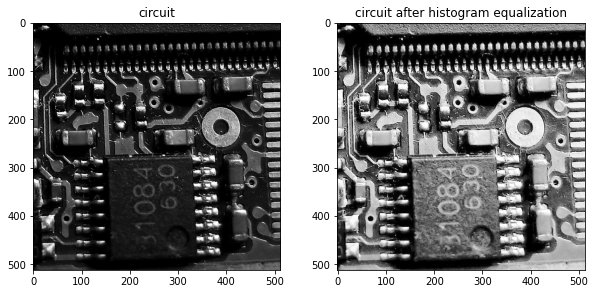

In [11]:
#
# Mettez votre code ici
#

circuit = io.imread(medium + "/circuit_512x512.jpg")
equalized = histeq(circuit)
figure = plt.figure(figsize=(10, 10))
figure.add_subplot(2, 2, 1)
plt.title("circuit")
plt.imshow(circuit, cmap='gray'); 
figure.add_subplot(2, 2, 2)
plt.title("circuit after histogram equalization")
plt.imshow(equalized, cmap='gray'); 

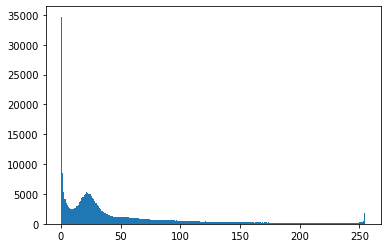

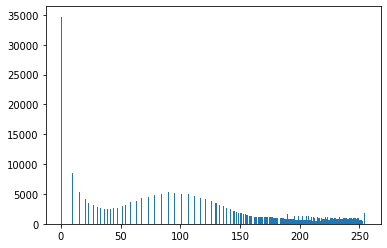

In [12]:
# Before histogram equalization
plt.hist(circuit.ravel(), bins = 256, range = [0, 255])
plt.show()

# After histogram equalization
plt.hist(equalized.ravel(), bins = 256, range = [0, 255])
plt.show()

Bien que l'égalisation d'histogramme soit une une technique efficace pour améliorer le contraste dans les images, surtout quand l'image est représentée par une plage étroite de valeurs d'intensité, il y a certaines situations où l'égalisation d'histogramme peut ne pas être bénéfique ou pourrait même dégrader la qualité de l'image :

1. Effets non naturels sur les photographies : L'égalisation d'histogramme peut produire des effets non naturels ou non souhaités dans les photographies, en modifiant les couleurs et les intensités lumineuses d'une manière qui ne reflète pas la scène réelle.
2. Augmentation du bruit : La méthode peut augmenter le contraste du bruit de fond, tout en diminuant le signal utilisable. Cela peut être particulièrement problématique dans les images où le rapport signal/bruit est déjà faible.
3. Perte de détail : Dans certains cas, l'égalisation d'histogramme peut entraîner une perte de détail dans les zones où l'histogramme est particulièrement dense, car elle étire également les régions de l'histogramme où les pixels sont nombreux, ce qui peut rendre certains détails moins visibles.

<div style="background-color:rgba(255, 183, 77, 0.8); padding:5pt" >    

---

#### **Manipulation n° 3.2**

1. Réaliser une égalisation d'histogramme sur l'image "highnoise.jpg".
2. L'égalisation d'histogramme vous semble-t-elle améliorer la dynamique de l'image (remarque : nous verrons dans une séance à venir des techniques de filtrage permettant de réduire le bruit dans les images) ?

---
    
</div>

In [ ]:
#
# Mettez votre code ici
#


## En résumé

L'histogramme illustre la distribution des intensités dans une image, influençant le contraste et la luminosité. Une égalisation d'histogramme modifie cette distribution pour améliorer le contraste, mais avec le risque d'augmenter le bruit ou de perdre des détails. Dans une séance à venir, nous parlerons de segmentation et des méthodes de seuillage qui utilisent la connaissance de l'histogramme pour la réaliser.